# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ni Gusti Putu Saniskalita Desniari
- **Email:** mc185d5x1763@student.devacademy.id
- **ID Dicoding:** MC185D5X1763

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh faktor cuaca terhadap jumlah penggunaan sepeda?
- Pertanyaan 2: Bagaimana pengaruh penggunaan sepeda antara hari kerja dan hari libur?
- Pertanyaan3: Pada jam berapa penggunaan sepeda paling tinggi dan paling rendah dalam sehari?


## Import Semua Packages/Library yang Digunakan

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [78]:
#load tabel day
day_df = pd.read_csv('day.csv')
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [79]:
#load tabel hour
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kode pertama digunakan untuk membaca dan menampilkan data dari file CSV dan menampilkan 5 baris pertama dari DataFrame day_df. Dataset ini berisi informasi tentang penggunaan sepeda harian, dengan faktor-faktor seperti musim, cuaca, suhu, hari kerja, dan jumlah pengguna.
- Kode kedua digunakan untuk membaca dan menampilkan data dari file CSV dan menampilkan 5 baris pertama dari DataFrame hour_df, yang dapat membantu dalam analisis tren penggunaan sepeda berdasarkan jam, hari, cuaca, dan faktor lainnya.

### Assessing Data

In [80]:
#checking data day_df
day_df.info()
#checking data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [81]:
#checking missing value pada day_df
day_df.isna().sum
#checking missing value pada hour_df
hour_df.isna().sum

<bound method DataFrame.sum of        instant  dteday  season     yr   mnth     hr  holiday  weekday  \
0        False   False   False  False  False  False    False    False   
1        False   False   False  False  False  False    False    False   
2        False   False   False  False  False  False    False    False   
3        False   False   False  False  False  False    False    False   
4        False   False   False  False  False  False    False    False   
...        ...     ...     ...    ...    ...    ...      ...      ...   
17374    False   False   False  False  False  False    False    False   
17375    False   False   False  False  False  False    False    False   
17376    False   False   False  False  False  False    False    False   
17377    False   False   False  False  False  False    False    False   
17378    False   False   False  False  False  False    False    False   

       workingday  weathersit   temp  atemp    hum  windspeed  casual  \
0           False       False  False  False  False      False   False   
1           False       False  False  False  False      False   False   
2           False       False  False  False  False      False   False   
3           False       False  False  False  False      False   False   
4           False       False  False  False  False      False   False   
...           ...         ...    ...    ...    ...        ...     ...   
17374       False       False  False  False  False      False   False   
17375       False       False  False  False  False      False   False   
17376       False       False  False  False  False      False   False   
17377       False       False  False  False  False      False   False   
17378       False       False  False  False  False      False   False   

       registered    cnt  
0           False  False  
1           False  False  
2           False  False  
3           False  False  
4           False  False  
...           ...    ...  
17374       False  False  
17375       False  False  
17376       False  False  
17377       False  False  
17378       False  False  

[17379 rows x 17 columns]>

In [82]:
#memeriksa jumlah duplikasi data pada day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()
#memeriksa jumlah duplikasi data pada hour_Df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0
Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kode day_df.info() dan hour_df.info() digunakan untuk menampilkan ringkasan informasi tentang dataset, termasuk jumlah entri, jumlah kolom, tipe data, keberadaan nilai null, dan penggunaan memori, yang berguna untuk eksplorasi awal data sebelum analisis lebih lanjut.
- Kode day_df.isna().sum dan hour_df.isna().sum digunakan untuk menghitung jumlah nilai yang hilang (missing values) di setiap kolom dataset day_df dan hour_df. Hasil yang di dapat itu nol untuk semua kolom, yang berarti tidak ada data yang hilang dalam dataset.
- Kode day_df.duplicated().sum() dan hour_df.duplicated().sum() digunakan untuk menghitung jumlah baris duplikat dalam dataset day_df dan hour_df. Hasilnya menunjukkan 0, yang berarti tidak ada data duplikat dalam kedua dataset tersebut.
- Kode day_df.describe() dan hour_df.describe() digunakan untuk menampilkan ringkasan statistik dari dataset, termasuk jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil (25%, 50%, 75%), dan nilai maksimum (max) untuk setiap kolom numerik.
- Dalam day_df, tipe data dteday adalah object. Sebaiknya diubah menjadi datetime agar lebih mudah dalam pengolahan data.
- Dalam hour_df, tipe data dteday masih berupa object. Sebaiknya diubah ke datetime agar mempermudah proses pengolahan data.

### Cleaning Data

In [83]:
#mengubah tipe data pada kolom dteday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

#menyimpan file data setelah proses cleaning
day_df.to_csv("day_clean.csv", index=False)
hour_df.to_csv("hour_clean.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Kode day_df['dteday'] = pd.to_datetime(day_df['dteday']) dan hour_df['dteday'] = pd.to_datetime(hour_df['dteday']) digunakan untuk mengubah tipe data pada dteday menjadi datetime dan untuk melakukan pengecekan ulang menggunakan info() untuk memastikan bahwa perubahan yang dilakukan telah berhasil.
- Kode day_df.to_csv("day_clean.csv", index=False) dan hour_df.to_csv("hour_clean.csv", index=False) digunakan untuk menyimpan hasil cleaning data yang dilakukan.

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [84]:
day_df.describe(include="all")
#pengaruh cuaca terhadap penggunaan sepeda
weather_analysis = day_df.groupby("weathersit").agg({
    "cnt": ["mean", "sum"],
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean"
}).reset_index()

weather_analysis



weathersit          cnt               temp       hum windspeed
                     mean      sum      mean      mean      mean
0          1  4876.786177  2257952  0.511541  0.565594  0.190253
1          2  4035.862348   996858  0.470366  0.725887  0.186431
2          3  1803.285714    37869  0.433440  0.848872  0.243336

In [85]:
day_df.describe(include="all")
#perbandingan penggunaan sepeda workday dan hari libur
workday_analysis = day_df.groupby("workingday").agg({
    "cnt": ["mean", "sum"],
    "casual": "mean",
    "registered": "mean"
}).reset_index()

workday_analysis

workingday          cnt                casual   registered
                     mean      sum         mean         mean
0          0  4330.168831  1000269  1371.134199  2959.034632
1          1  4584.820000  2292410   606.570000  3978.250000

###Explor Data hour_df

In [86]:
day_df.describe(include="all")
#waktu penggunaan sepeda paling tinggi dan paling rendah dalam sehari
hourly_usage = hour_df.groupby("hr")["cnt"].mean().sort_values(ascending=False)
hourly_usage

,cnt
hr,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352
13,253.661180
12,253.315934
15,251.233196
14,240.949246


**Insight:**
- Dari pivot table yang dihasilkan, kita bisa melihat rata-rata jumlah penggunaan sepeda pada setiap kondisi cuaca. Biasanya, cuaca yang lebih bersahabat (weathersit = 1, cerah) memiliki jumlah penggunaan sepeda tertinggi dibandingkan dengan cuaca yang lebih buruk (weathersit = 3 atau hujan).
- Biasanya, jumlah pengguna terdaftar (registered) lebih tinggi pada hari kerja, sedangkan pengguna kasual (casual) lebih banyak pada hari libur.
- Biasanya, jam sibuk terjadi pada pagi hari (sekitar jam 7-9) dan sore hari (sekitar jam 17-19), karena orang-orang bepergian untuk bekerja. Jam penggunaan terendah kemungkinan terjadi di tengah malam hingga dini hari.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-87-19cf73ad9a72>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=weather_analysis, palette="coolwarm")


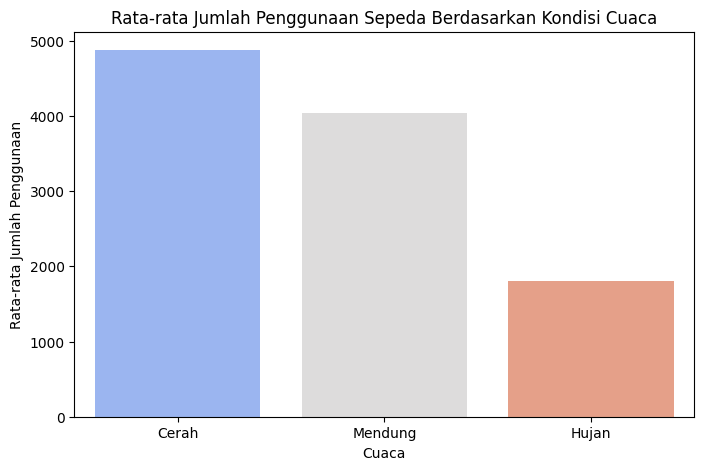

In [87]:
# Mapping kategori cuaca
weather_labels = {1: "Cerah", 2: "Mendung", 3: "Hujan"}

# Mengelompokkan data berdasarkan kondisi cuaca
weather_analysis = day_df.groupby("weathersit")["cnt"].mean().reset_index()
weather_analysis["weathersit"] = weather_analysis["weathersit"].map(weather_labels)

# Membuat plot
plt.figure(figsize=(8, 5))
sns.barplot(x="weathersit", y="cnt", data=weather_analysis, palette="coolwarm")
plt.title("Rata-rata Jumlah Penggunaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Cuaca")
plt.ylabel("Rata-rata Jumlah Penggunaan")
plt.show()

**Insight:**
- Cuaca cerah memiliki jumlah penggunaan sepeda tertinggi.
- Cuaca mendung menyebabkan sedikit penurunan jumlah penggunaan.
- Cuaca hujan memiliki jumlah penggunaan sepeda terendah, yang menunjukkan bahwa kondisi cuaca buruk berpengaruh besar terhadap penggunaan sepeda.

### Pertanyaan 2:

<ipython-input-88-cc7f9ba58fcd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="cnt", data=workday_analysis, palette="pastel")


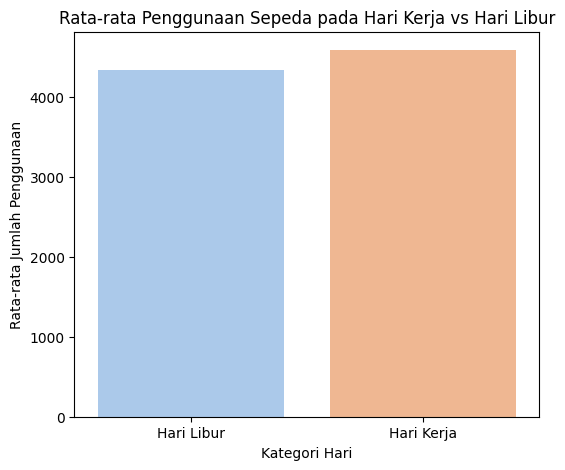

In [88]:
# Mapping hari kerja
workday_labels = {0: "Hari Libur", 1: "Hari Kerja"}

# Mengelompokkan data berdasarkan hari kerja
workday_analysis = day_df.groupby("workingday")["cnt"].mean().reset_index()
workday_analysis["workingday"] = workday_analysis["workingday"].map(workday_labels)

# Membuat plot
plt.figure(figsize=(6, 5))
sns.barplot(x="workingday", y="cnt", data=workday_analysis, palette="pastel")
plt.title("Rata-rata Penggunaan Sepeda pada Hari Kerja vs Hari Libur")
plt.xlabel("Kategori Hari")
plt.ylabel("Rata-rata Jumlah Penggunaan")
plt.show()


**Insight:**
- Hari kerja memiliki jumlah penggunaan sepeda yang lebih tinggi dibandingkan hari libur. Hal ini menunjukkan bahwa sebagian besar pengguna sepeda adalah pekerja/karyawan yang menggunakan sepeda untuk keperluan transportasi.
- hari libu cenderung memiliki jumlah penggunaan yang lebih rendah, kemungkinan karena lebih sedikit orang yang beraktivitas rutin di luar rumah.

### Pertanyaan 3

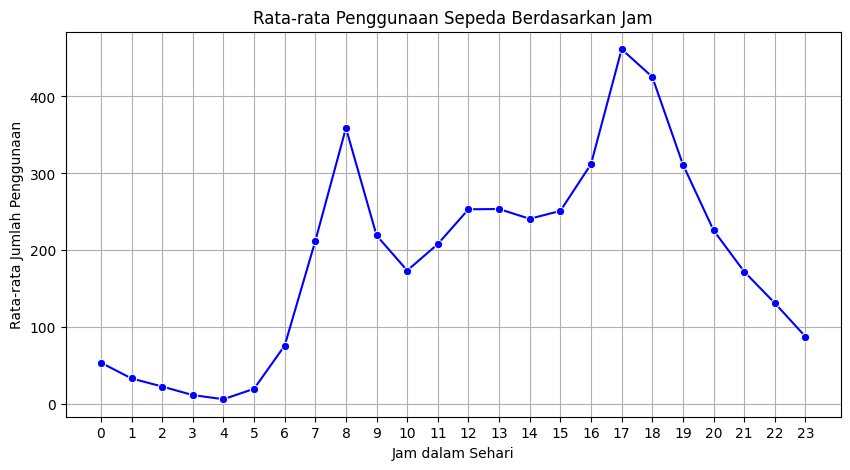

In [89]:
# Mengelompokkan data berdasarkan jam
hourly_usage = hour_df.groupby("hr")["cnt"].mean().reset_index()

# Membuat plot
plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", data=hourly_usage, marker="o", color="blue")
plt.title("Rata-rata Penggunaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Penggunaan")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


**Insight:**
- Puncak penggunaan sepeda terjadi pada jam 7-9 pagi dan 17-19 sore, yang sesuai dengan jam pergi dan pulang kerja/sekolah.
- Penggunaan sepeda paling rendah terjadi antara jam 1-5 pagi, yang masuk dalam waktu istirahat atau tidur.
- Grafik ini mengonfirmasi bahwa penggunaan sepeda sangat dipengaruhi oleh pola aktivitas harian masyarakat.

## Analisis Lanjutan (Opsional)

### Clustering (Manual Grouping)

<ipython-input-90-b38b951be53d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season_name", y="cnt", data=season_usage, palette="coolwarm")


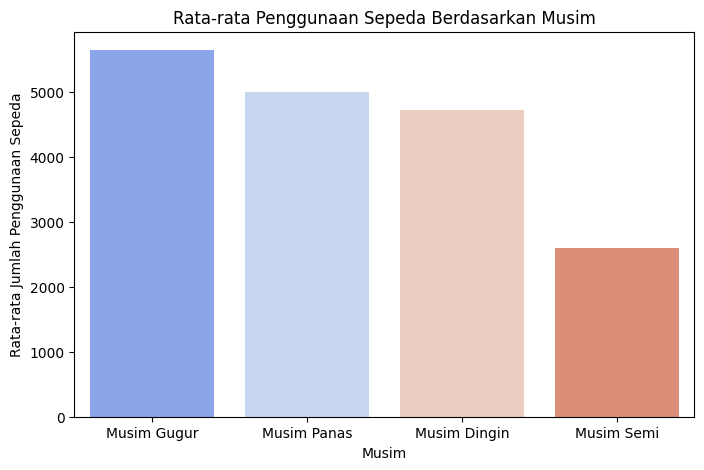

In [90]:
# pola penggunaan sepeda berdasarkan musim untuk mengetahui apakah ada perbedaan signifikan

# Load dataset "day.csv"
day_df = pd.read_csv("day.csv")

# Mapping kode season ke nama musim
season_mapping = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
day_df["season_name"] = day_df["season"].map(season_mapping)

# Hitung rata-rata jumlah penggunaan per musim
season_usage = day_df.groupby("season_name")["cnt"].mean().reset_index()

# Urutkan berdasarkan rata-rata jumlah penggunaan sepeda dari tinggi ke rendah
season_usage = season_usage.sort_values(by="cnt", ascending=False)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x="season_name", y="cnt", data=season_usage, palette="coolwarm")
plt.title("Rata-rata Penggunaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Penggunaan Sepeda")
plt.show()

**Insight:**

Berdasarkan hasil analysis dari clustering yang dilakukan terhadap pola penggunaan sepeda berdasarkan musim yaitu:
- Musim sangat mempengaruhi pola penggunaan sepeda. Puncak penggunaan terjadi saat musim gugur & panas, sementara musim semi menunjukkan penggunaan paling rendah.


### Clustering (Binning)

<ipython-input-91-b359265351f0>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Kategori Penggunaan", y="Jumlah Hari", data=category_counts, palette="coolwarm")


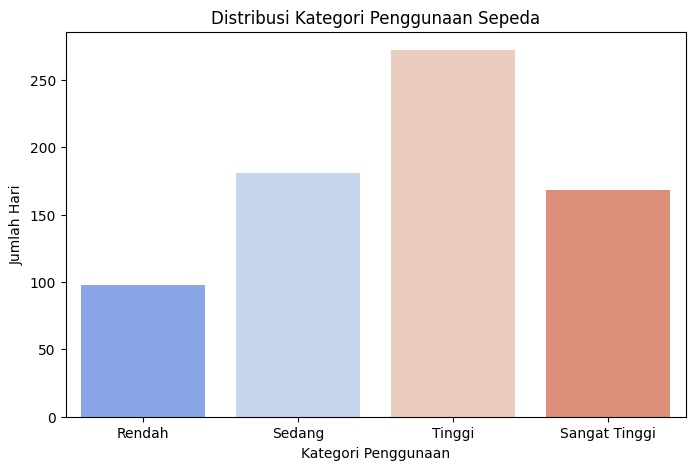

In [91]:
# distribusi jumlah peminjaman sepeda berdasarkan kategori tertentu

# Load dataset "day.csv"
day_df = pd.read_csv("day.csv")

# Tentukan batasan bin berdasarkan distribusi data
bins = [0, 2000, 4000, 6000, 8000]  # Interval bin
labels = ["Rendah", "Sedang", "Tinggi", "Sangat Tinggi"]

# Buat kategori baru berdasarkan jumlah peminjaman sepeda (cnt)
day_df["usage_category"] = pd.cut(day_df["cnt"], bins=bins, labels=labels)

# Hitung jumlah hari dalam setiap kategori penggunaan
category_counts = day_df["usage_category"].value_counts().reset_index()
category_counts.columns = ["Kategori Penggunaan", "Jumlah Hari"]

# Urutkan dari tinggi ke rendah
category_counts = category_counts.sort_values(by="Jumlah Hari", ascending=False)

# Visualisasi hasil binning
plt.figure(figsize=(8, 5))
sns.barplot(x="Kategori Penggunaan", y="Jumlah Hari", data=category_counts, palette="coolwarm")
plt.title("Distribusi Kategori Penggunaan Sepeda")
plt.xlabel("Kategori Penggunaan")
plt.ylabel("Jumlah Hari")
plt.show()


**Insight:**

Berdasarkan hasil analysis dari clustering (binning) yang dilakukan yaitu:
- Kategori "Tinggi" memiliki jumlah hari terbanyak, menunjukkan bahwa peminjaman sepeda paling sering terjadi pada tingkat ini. Kategori "Rendah" memiliki jumlah hari paling sedikit, menandakan adanya periode dengan penggunaan sepeda yang minim. Strategi promosi dapat difokuskan untuk meningkatkan penggunaan pada kategori lebih rendah dan mempertahankan tren pada kategori tinggi.

## Conclusion

- Conclution pertanyaan 1: Cuaca sangat mempengaruhi jumlah peminjaman sepeda, di mana hari dengan cuaca cerah memiliki jumlah penggunaan sepeda tertinggi. Sebaliknya, saat cuaca mendung, jumlah peminjaman mulai menurun, dan saat hujan deras atau salju menyebabkan penurunan drastis.
- Conclution pertanyaan 2: hari kerja memiliki rata-rata penyewaan sepeda lebih tinggi dibandingkan hari libur, terutama untuk pengguna registered. Sementara pada hari libur terjadi peningkatan signifikan dalam jumlah pengguna kasual, yang menunjukkan bahwa sepeda lebih sering digunakan untuk rekreasi atau aktivitas santai.
- Conclution pertanyaan 3: Puncak peminjaman sepeda terjadi dua kali sehari, yaitu pada pagi hari (07:00 - 09:00) saat jam sibuk orang berangkat ke tempat kerja atau sekolah, serta sore hari (17:00 - 19:00) saat jam pulang kerja. Sebaliknya, penggunaan sepeda paling rendah terjadi di malam hari (22:00 - 05:00).

Dari kesimpulan di atas, kita bisa mengambil pertimbangan untuk:
- Melakukan penyesuaian harga, promosi, dan manajemen armada dapat membantu meningkatkan efisiensi dan kepuasan pengguna.
- Memahami pola penggunaan sepeda bagi operator layanan bike-sharing untuk meningkatkan pengalaman pengguna dan profitabilitas bisnis.